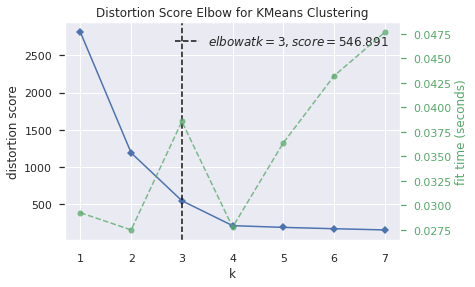

In [77]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer
from sklearn.datasets.samples_generator import make_blobs

X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

#The best k is 3

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 8))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.poof()

In [78]:
from sklearn.datasets import load_digits

digits = load_digits()
print (digits.data.shape)
print (digits['images'][0])
# this will print (8*8). That is the reason why we will have 64=8*8 dimensions
print (digits['images'][0].shape)

kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(1797, 64)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
(8, 8)


(3, 64)

In [71]:
from scipy.stats import mode
import numpy as np

#create zero matrix with the same shape
labels = np.zeros_like(clusters)
for i in range(3):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]
    
print (labels.shape)
print (labels)

(1797,)
[6 7 7 ... 7 3 3]


In [72]:
from sklearn.metrics import accuracy_score

accuracy_score(digits.target, labels)

0.2921535893155259

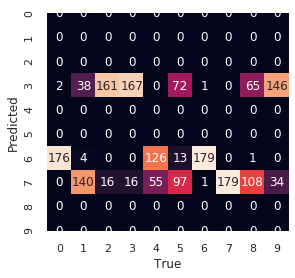

In [79]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)

plt.xlabel('True')
plt.ylabel('Predicted');